In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('ScreenTime vs MentalWellness.csv')

This dataset captures insights from 400 survey participants on how their daily screen usage relates to mental wellness. With the growing prevalence of digital devices in our lives, understanding the link between screen time, sleep quality, stress, and productivity is a crucial research area for data science, psychology, and public health.

In [4]:
df.head()

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3,NaN
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2,NaN
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6,NaN
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0,NaN
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0,NaN


In [5]:
df.set_index('user_id')

,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
user_id,,,,,,,,,,,,,,,
U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3,NaN
U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2,NaN
U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6,NaN
U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0,NaN
U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U0396,26,Female,Student,Remote,6.43,2.99,3.44,7.75,1,5.9,64.6,252,7.6,39.3,NaN
U0397,16,Male,Self-employed,Remote,9.59,5.44,4.15,5.57,1,10.0,47.4,99,7.0,3.5,NaN
U0398,40,Male,Student,Remote,8.72,2.36,6.36,7.56,1,9.4,57.3,193,10.1,6.6,NaN


We change the default index and replace user_id as the index.

In [6]:
df.shape


(400, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  exercise_minutes_per_week    400 non-null    int64  
 13  social_hours_per_wee

In [8]:
df.describe()

,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,0.0
mean,29.77750,9.024900,2.183075,6.841825,7.013175,1.397500,8.150500,54.306500,109.810000,7.905000,20.326750,NaN
std,7.46608,2.491058,1.931321,2.220896,0.852421,0.652348,2.094844,15.020054,70.007045,4.909632,20.376793,NaN
min,16.00000,1.000000,0.110000,0.890000,4.640000,1.000000,0.000000,20.600000,0.000000,0.000000,0.000000,NaN
25%,24.00000,7.372500,0.695000,5.460000,6.397500,1.000000,6.900000,43.600000,58.000000,4.575000,3.675000,NaN
50%,30.00000,9.090000,1.455000,6.700000,7.030000,1.000000,8.800000,51.750000,103.000000,7.750000,14.800000,NaN
75%,35.00000,10.495000,3.012500,8.417500,7.640000,2.000000,10.000000,63.000000,157.000000,11.025000,30.650000,NaN
max,60.00000,19.170000,12.040000,13.350000,9.740000,4.000000,10.000000,100.000000,372.000000,23.900000,97.000000,NaN


In [9]:
df.describe(include = 'object')

,user_id,gender,occupation,work_mode
count,400,400,400,400
unique,400,3,5,3
top,U0384,Female,Employed,Remote
freq,1,222,207,150


We have one column named 'Unnamed: 15' which holds null values only so we will drop the colum.

In [10]:
df.drop('Unnamed: 15', axis = 1, inplace = True)

Now we will start visualizing and seeing the relationships between the columns.

In [11]:
gender_count = df['gender'].value_counts()
work_mode_count  = df['work_mode'].value_counts()
age_count = df['age'].value_counts()
occupation_count = df['occupation'].value_counts()

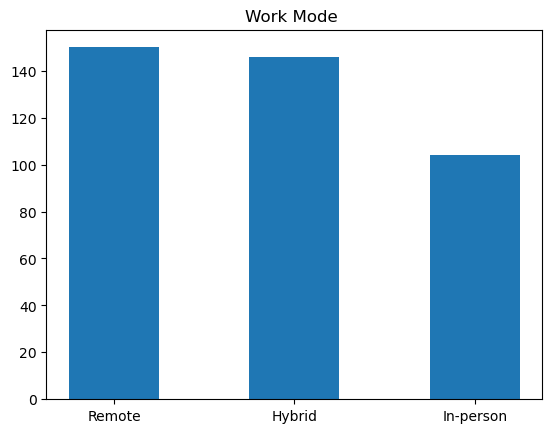

In [12]:
#Using matplotlib
plt.bar(work_mode_count.index, work_mode_count, width=0.5)
plt.title('Work Mode ')
plt.show()

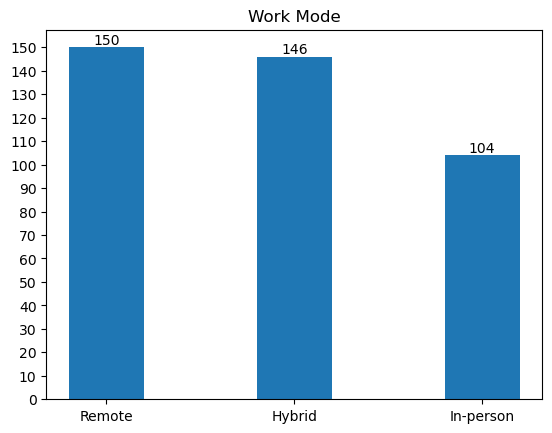

In [13]:
#Using matplotlib subplots and shwoing value counts
from matplotlib import ticker
fig , ax = plt.subplots()
bars = ax.bar(work_mode_count.index , work_mode_count, width= 0.4)
ax.bar_label(bars, fmt='%d')
plt.title('Work Mode')
plt.ylabel('')
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

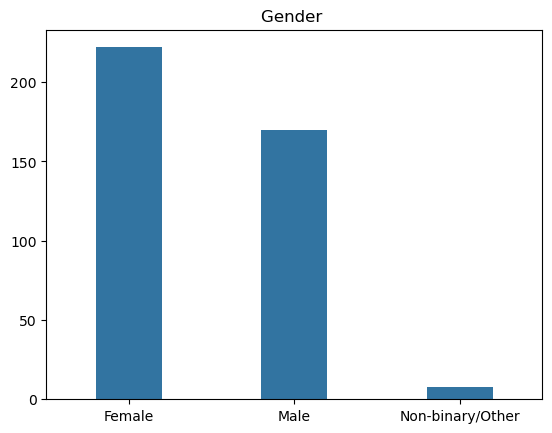

In [14]:
#Using seaborn
sns.countplot(data = df , x = 'gender', width=0.4)
plt.title('Gender ')
plt.ylabel('')
plt.xlabel('')
plt.show()

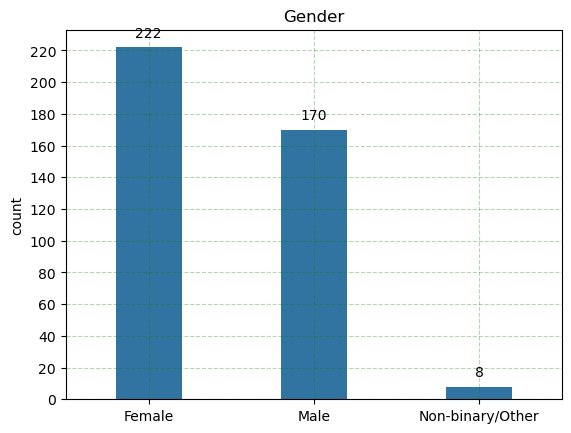

In [15]:
#Seaborn and displaying value counts
ax = sns.countplot(data = df , x = 'gender', width=0.4)
plt.grid(True, linestyle= '--', color = 'green', alpha = 0.3)
bars = ax.containers[0]
ax.bar_label(bars, padding=5)
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
plt.title('Gender')
plt.xlabel('')
plt.show()

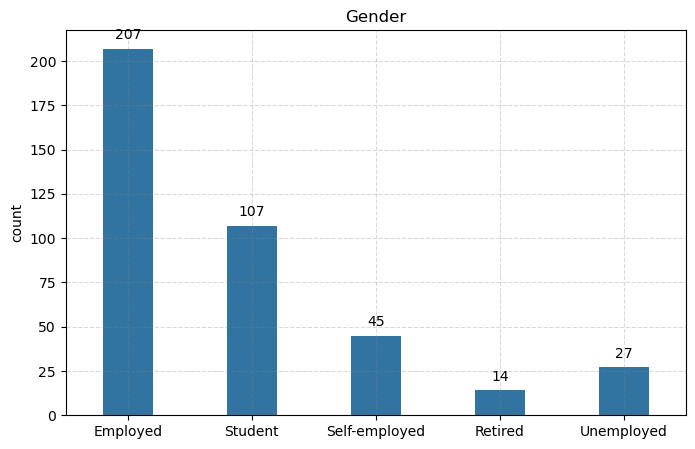

In [16]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data = df , x = 'occupation', width=0.4)
plt.grid(True, linestyle= '--', color = 'gray', alpha = 0.3)
bars = ax.containers[0]
ax.bar_label(bars, padding=5)
plt.title('Gender')
plt.xlabel('')
plt.show()

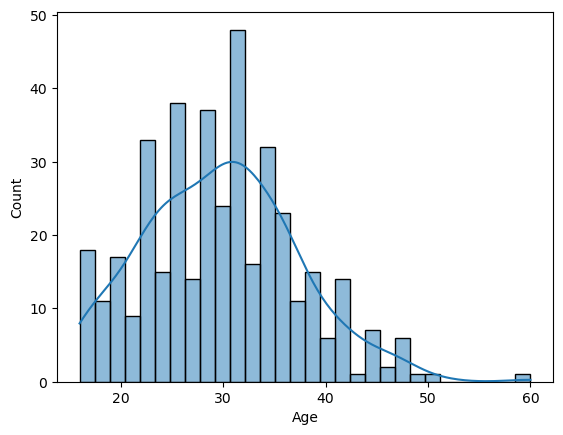

In [17]:
sns.histplot(data= df , x = 'age', bins = 30, kde = True)
plt.xlabel('Age')
plt.show()

Majority of the participants are between the age 30 and 32

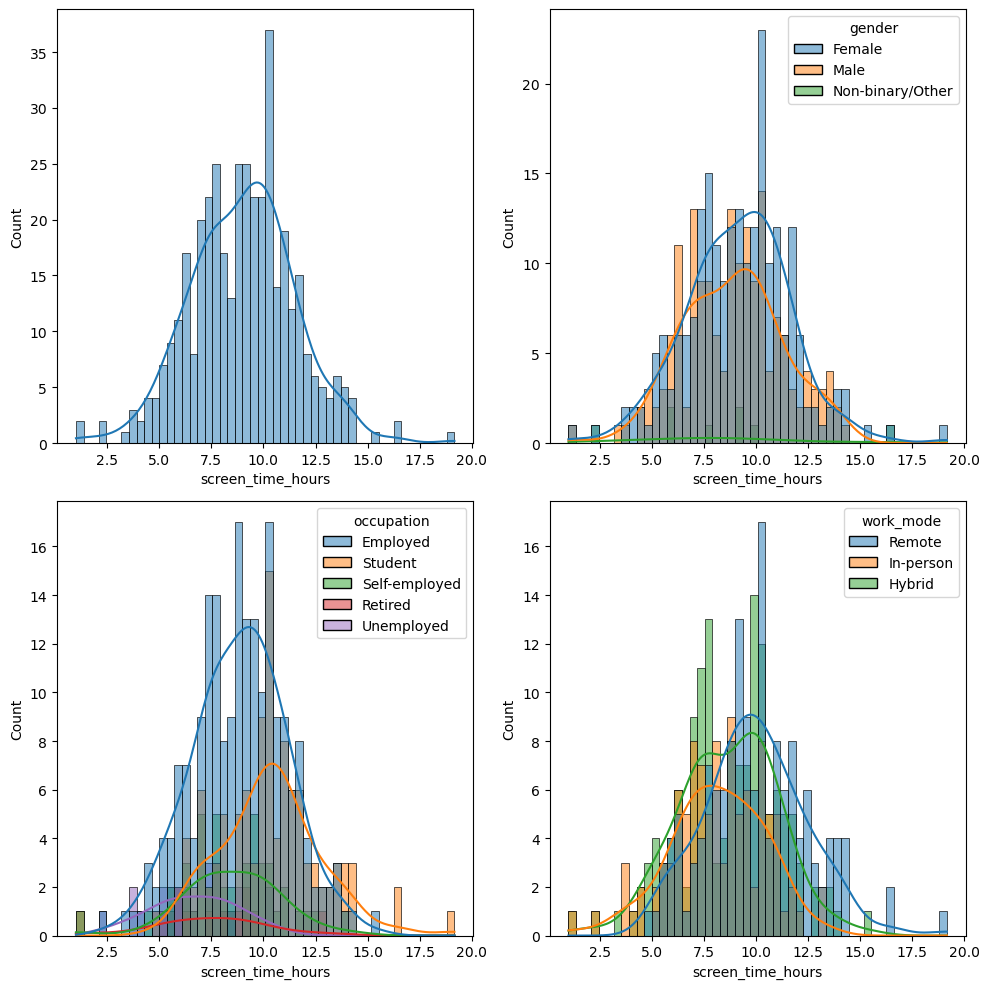

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=df, x='screen_time_hours', bins=50, kde=True, ax=axes[0, 0])
sns.histplot(data=df, x='screen_time_hours', bins=50, kde=True, hue='gender', ax=axes[0, 1])
sns.histplot(data=df, x='screen_time_hours', bins=50, kde=True, hue='occupation', ax=axes[1, 0])
sns.histplot(data=df, x='screen_time_hours', bins=50, kde=True, hue='work_mode', ax=axes[1, 1])

plt.tight_layout()
plt.show()

In [19]:
numerical_data = [column for column in df.columns if df[column].dtype != 'O']
numerical_data.sort()
numerical_data

['age',
 'exercise_minutes_per_week',
 'leisure_screen_hours',
 'mental_wellness_index_0_100',
 'productivity_0_100',
 'screen_time_hours',
 'sleep_hours',
 'sleep_quality_1_5',
 'social_hours_per_week',
 'stress_level_0_10',
 'work_screen_hours']

In [20]:
column_arrays = {col: df[col].values for col in numerical_data}
column_arrays

{'age': array([33, 28, 35, 42, 28, 28, 42, 36, 26, 34, 26, 26, 31, 16, 16, 25, 21,
        32, 22, 18, 41, 28, 30, 18, 25, 30, 20, 33, 25, 27, 25, 44, 29, 21,
        36, 20, 31, 16, 19, 31, 35, 31, 29, 27, 18, 24, 26, 38, 32, 16, 32,
        26, 24, 34, 38, 37, 23, 27, 32, 37, 26, 28, 21, 20, 36, 40, 29, 38,
        32, 24, 32, 42, 29, 42, 16, 36, 30, 27, 30, 16, 28, 32, 41, 25, 23,
        25, 37, 32, 25, 34, 30, 37, 24, 27, 26, 18, 32, 32, 30, 28, 18, 26,
        27, 23, 28, 33, 45, 31, 32, 29, 16, 29, 30, 49, 28, 32, 29, 20, 39,
        36, 36, 22, 41, 18, 34, 47, 22, 25, 30, 25, 17, 30, 21, 33, 22, 42,
        23, 27, 36, 20, 31, 40, 17, 31, 32, 36, 20, 19, 34, 32, 32, 32, 24,
        31, 32, 24, 44, 33, 20, 35, 22, 36, 39, 23, 37, 33, 36, 45, 28, 23,
        22, 23, 29, 32, 32, 36, 30, 41, 27, 51, 35, 23, 21, 33, 28, 35, 33,
        29, 23, 17, 26, 36, 31, 20, 31, 33, 22, 31, 30, 20, 32, 34, 38, 38,
        18, 22, 34, 34, 34, 60, 34, 39, 37, 35, 27, 36, 23, 28, 26, 30, 48,
     

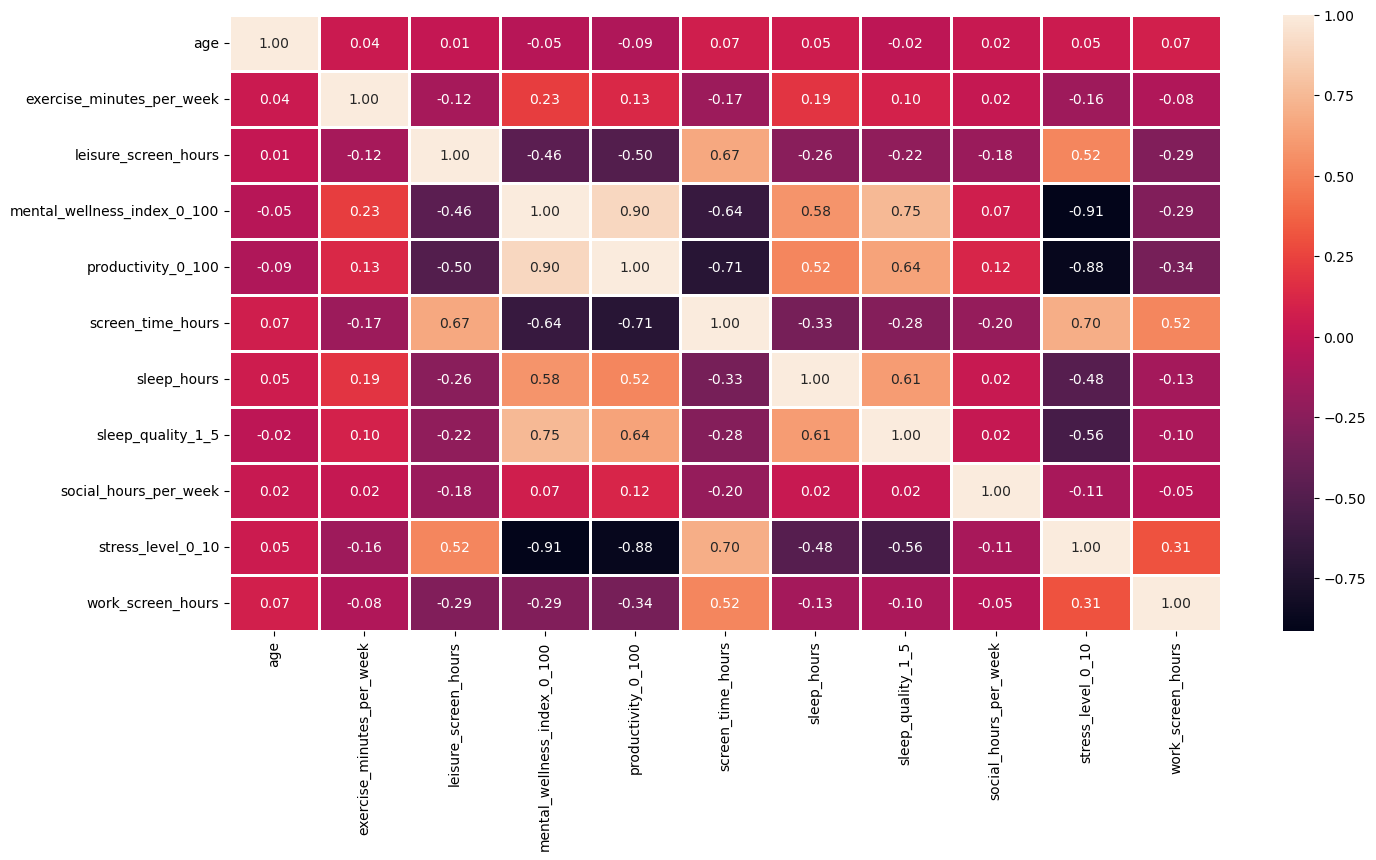

In [21]:
data = pd.DataFrame(column_arrays)
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot = True, fmt = '.2f', linewidths=1)
plt.show()

The above heatmap shows the relation between all the numerical data in our dataframe. 
From the above heatmap, we can see that there is highly positive correlation between productivity and mental wellness, followed by sleep quality and mental wellness and then sleep quality and productivity.
There is highly negative corrleation between mental wellness and stress level, then comes productivity and stress level.

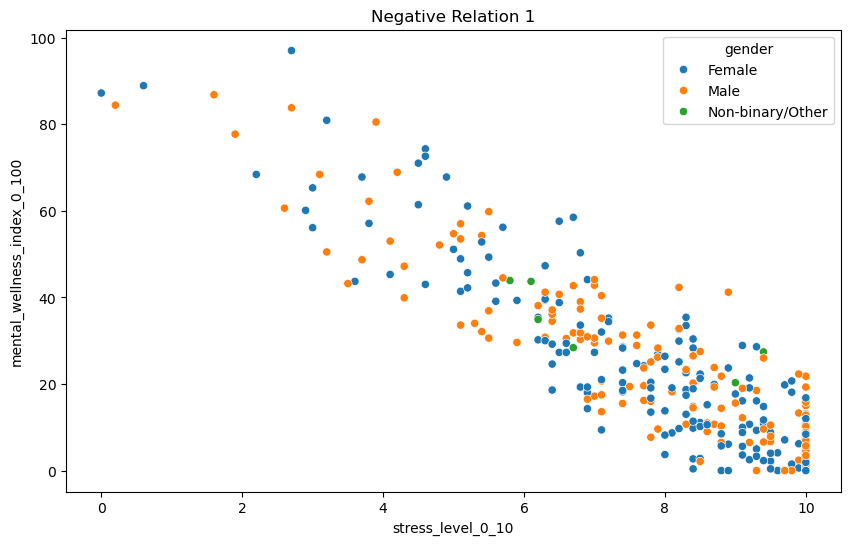

In [43]:
#now we will see the relation of some of the columns in scatterplot.
plt.figure(figsize = (10,6))
sns.scatterplot(x = df['stress_level_0_10'], y=df['mental_wellness_index_0_100'], hue = df['gender'])
plt.title('Negative Relation 1')
plt.show()

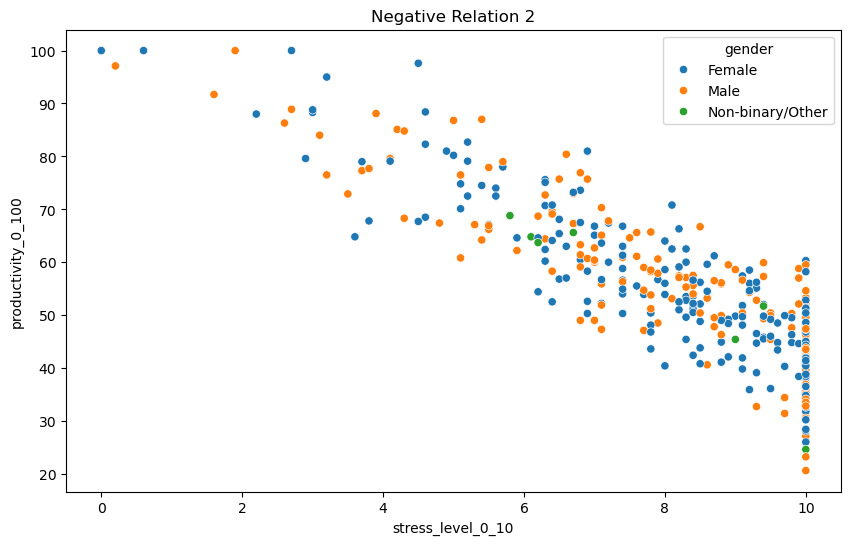

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = df['stress_level_0_10'], y=df['productivity_0_100'], hue = df['gender'])
plt.title('Negative Relation 2')
plt.show()

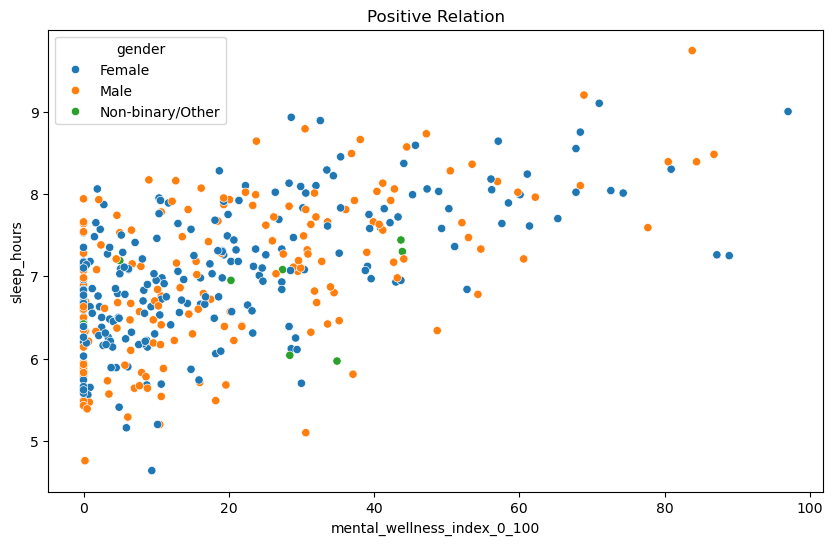

In [40]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = df['mental_wellness_index_0_100'], y=df['sleep_hours'], hue = df['gender'])
plt.title('Positive Relation')
plt.show()

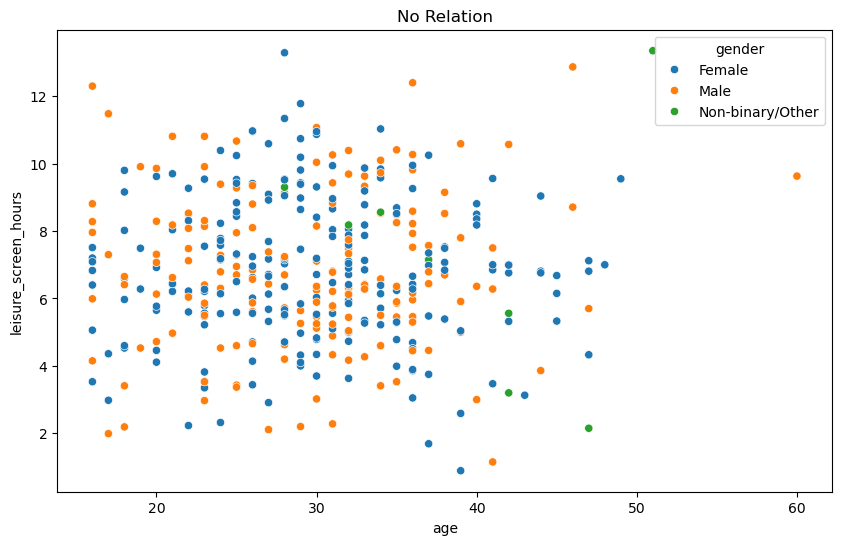

In [42]:
#Now we wil see two columns that have almost no correlation at all.
plt.figure(figsize = (10,6))
sns.scatterplot(x = df['age'], y=df['leisure_screen_hours'], hue = df['gender'])
plt.title('No Relation')
plt.show()